# Systems and Tool Chains for AI Engineers
## Course Project Option 1
### Rishi Mandyam and Jayant Sharma

In [1]:
import pyspark
from pyspark.sql.functions import col, when, regexp_extract, count, isnan, collect_set
from pyspark.sql import SparkSession
from pyspark import SparkContext, SQLContext

appName = "Big Data Analytics"
master = "local"

# Create Configuration object for Spark.
conf = pyspark.SparkConf()\
    .set('spark.driver.host','127.0.0.1')\
    .setAppName(appName)\
    .setMaster(master)

sc = SparkContext.getOrCreate(conf=conf)

sqlContext = SQLContext(sc)

spark = sqlContext.sparkSession.builder.getOrCreate()

D:\Anaconda\lib\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [2]:
col_names = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 
    'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 
    'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 
    'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 
    'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 
    'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 
    'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 
    'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 
    'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 
    'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
    'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 
    'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 
    'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 
    'nation_logo_url', 'nation_flag_url']

In [5]:
df = spark.read.csv("players_15.csv",header=True, inferSchema= True).toDF(*col_names)
df = df.withColumn("Gender", lit("Male"))
df = df.withColumn("Year", lit("2015"))

In [6]:
for year, file_name in enumerate(["players_16.csv","players_17.csv","players_18.csv","players_19.csv","players_20.csv","players_21.csv","players_22.csv"]):
    year = year + 2016
    df_new = spark.read.csv(file_name,header=True, inferSchema= True).toDF(*col_names)
    df_new = df_new.withColumn("Gender", lit("Male"))
    df_new = df_new.withColumn("Year", lit(year))
    df = df.union(df_new)

In [7]:
df_females = spark.read.csv("female_players_16.csv",header=True, inferSchema= True).toDF(*col_names)
df_females = df_females.withColumn("Gender", lit("Female"))
df_females = df_females.withColumn("Year", lit("2016"))

In [8]:
#Repeating the same step for females: 
for year, file_name in enumerate(['female_players_17.csv','female_players_18.csv','female_players_19.csv', 'female_players_20.csv',  'female_players_21.csv', 'female_players_22.csv']):
    year = year + 2017
    df_new = spark.read.csv(file_name,header=True, inferSchema= True).toDF(*col_names)
    df_new = df_new.withColumn("Gender", lit("Female"))
    df_new = df_new.withColumn("Year", lit(year))
    df_females = df_females.union(df_new)

In [9]:
df_all= df.union(df_females) # Fusing the male and female dataframe 

In [10]:
df_all = df_all.withColumn("id", monotonically_increasing_id())
new_column_order = ["id"] + [col for col in df_all.columns if col != "id"]
df_all = df_all.select(new_column_order)
df_all = (df_all.withColumn("Data_Year", df_all["Year"].cast("integer")).drop("Year")) #fixing the datatype for year

In [11]:
df_all.count()

144323

In [3]:
#Defining PostgreSQL
db_properties={}

db_properties['username']="postgres" #Change here 
db_properties['password']=" Add password" #Change here
db_properties['url']= "jdbc:postgresql://localhost:5432/course_project" #Change course_project
db_properties['table']="fifa"
db_properties['driver']="org.postgresql.Driver"

In [11]:
# Writing dataframe to PostgresSQl 
df_all.write.format("jdbc")\
.mode("overwrite")\
.option("url", db_properties['url'])\
.option("dbtable", db_properties['table'])\
.option("user", db_properties['username'])\
.option("password", db_properties['password'])\
.option("Driver", db_properties['driver'])\
.save()

In [4]:
df_read = sqlContext.read.format("jdbc")\
    .option("url", db_properties['url'])\
    .option("dbtable", db_properties['table'])\
    .option("user", db_properties['username'])\
    .option("password", db_properties['password'])\
    .option("Driver", db_properties['driver'])\
    .load()

In [15]:
df_read.printSchema()

root
 |-- id: long (nullable = true)
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: string (nullable = true)
 |-- wage_eur: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: date (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: string (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: string (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: string (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: string (nullable = true)
 |-- club_contract_valid_until: string (nullable = true)
 |-- nationality_

### Task 2

In [8]:
df_males = df_read.filter((col("Gender") == "Male"))
df_males.count() #Number of males in the dataset

142079

In [15]:
# This is a function to get the (y) clubs with the highest number of players with contracts ending in or after year (z)

def get_top_clubs(df, year_x, clubs_y, year_z):
    # Handling cases where the function inputs are invalid or outside of the bounds of the information in the dataset
    if year_x < 2015 or year_x > 2022:
        return "Invalid year X. Please input a value for year X between 2015 and 2022, inclusive."

    if clubs_y <= 0:
        return "Invalid number Y. Please input a positive integer value for Y."

    if year_z < 2023:
        return "Invalid year Z. Please input a value for year Z of 2023 or later."

    # gets players from year x whose contracts end in or after year z
    filtered_df = df.filter((col('Data_Year') == year_x) & (col('club_contract_valid_until') >= year_z))
    
    # Group by 'club', count the players in each club, and order by the count in descending order
    top_clubs_df = filtered_df.groupBy('club_name').agg(count('*').alias('player_count'))\
                              .orderBy(col('player_count').desc())\
                              .limit(clubs_y)
    
    return top_clubs_df.select("club_name").show(truncate = False)

In [16]:
get_top_clubs(df_males,2022,5, 2023)

+------------------------+
|club_name               |
+------------------------+
|Leeds United            |
|Sevilla FC              |
|FC Barcelona            |
|VfB Stuttgart           |
|Borussia Mönchengladbach|
+------------------------+



In [17]:
# Function that lists the top clubs with the highest or lowest average player age in a given year
def list_clubs_by_avg_age(df, year, clubs_X, order='highest'):

    # handles case where the number of clubs requested is less than or equal to 0
    if clubs_X <= 0:
        return 'Invalid number of entries requested. The number should be a positive integer.'
        
    # handles the case where the year requested is outside of the bounds of the data
    if year <= 2015 or year >= 2022:
        return 'Invalid year. Please input a value for year between 2015 and 2022 inlusive.'
        
    df_filtered = df.filter(col('Data_Year') == year) # Get all clubs in a given year
    club_avg_age = df_filtered.groupBy('club_name').agg(avg('age').alias('avg_age')) # get avg age of each club
    club_avg_age = club_avg_age.withColumn('avg_age', round(col('avg_age'), 2)) # round age to 2 decimal places

    # orders the list in ascending or descending order based on the user input
    if order == 'highest':
        sorted_clubs = club_avg_age.orderBy(col('avg_age').desc())
    elif order == 'lowest':
        sorted_clubs = club_avg_age.orderBy(col('avg_age').asc())
    else:
        return print(" Invalid Function Argument, only 'highest' and 'lowest' accepted.")

    # create a new truncated list of only the number of clubs requested
    top_x_sorted_clubs = sorted_clubs.limit(clubs_X) # limit the list by X

    # must handle the case where the number of clubs tied for the last average is greater than the number of clubs wanted in the list
    
    last_club = top_x_sorted_clubs.collect()[-1] # get the entry at end of the limited sorted list
    last_avg_age = last_club['avg_age'] # saves the value

    # Finds all clubs in the sorted list that have the same average age as the last average in the top x sorted clubs list
    tied_clubs = sorted_clubs.filter(col('avg_age') == last_avg_age)#.select() # get all clubs with avg age tied for last    
    final_clubs = top_x_sorted_clubs.union(tied_clubs) # Combines the dataframes
    final_clubs = final_clubs.distinct().orderBy('avg_age', ascending=False) # removes the duplicates
    return final_clubs.select("club_name","avg_age").show(truncate = False) # returns the final dataframe

In [18]:
list_clubs_by_avg_age(df_males, 2016, 3, order = 'highest')

+----------------------------+-------+
|club_name                   |avg_age|
+----------------------------+-------+
|Dorados de Sinaloa          |28.93  |
|Bruk-Bet Termalica Nieciecza|28.23  |
|Chievo Verona               |28.11  |
+----------------------------+-------+



In [19]:
from pyspark.sql import Window
# This function finds the most popular nationality of players for each year that data was collected
def max_nations(df):
    
    # Group by year and nationality, count occurrences
    most_common_nationality = df.groupBy("Data_Year", "nationality_name") \
        .count()
    
    # Define a Window specification
    # partitions the data by the year and puts it in descending order
    window_spec = Window.partitionBy("Data_Year").orderBy(desc("count"))
    
    # Add rank to the most common nationality
    most_popular_per_year = most_common_nationality \
        .withColumn("rank", row_number().over(window_spec)) \ # ranks based off of the window spec (by year)
        .filter(col("rank") == 1) \
        .select("Data_Year", "nationality_name")

    return most_popular_per_year.show()

In [20]:
max_nations(df_males)

+---------+----------------+
|Data_Year|nationality_name|
+---------+----------------+
|     2015|         England|
|     2016|         England|
|     2017|         England|
|     2018|         England|
|     2019|         England|
|     2020|         England|
|     2021|         England|
|     2022|         England|
+---------+----------------+



### Question 3

In [10]:
df_main = df_males
df_main.count() #Our main working dataset

142079

In [88]:
df_main.printSchema()

root
 |-- id: long (nullable = true)
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: string (nullable = true)
 |-- wage_eur: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: date (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: string (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: string (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: string (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: string (nullable = true)
 |-- club_contract_valid_until: string (nullable = true)
 |-- nationality_

In [11]:
#Going through the schema for all the columns, dropping DOB cause it's date and changing preferred_foot to binary as it's 
#either left or right
df_drop = df_main.drop('dob')

In [12]:
df_drop = df_drop.withColumn("preferred_foot", 
                             when(df_drop["preferred_foot"] == "Right", 0)
                             .when(df_drop["preferred_foot"] == "Left", 1)
                             .otherwise(df_drop["preferred_foot"]))
df_drop = df_drop.withColumn("Gender", 
                             when(df_drop["Gender"] == "Male", 1)
                             .when(df_drop["Gender"] == "Female", 0)
                             .otherwise(df_drop["Gender"]))

#Since it was an all males dataset, we ended up dropping the Gender column cause it is insignificant

In [13]:
#Dropping values that are not relevant in our research/model
df_drop = df_drop.drop('sofifa_id', 'player_url','player_positions', 'club_name', 'league_name', 'club_jersey_number', 'club_loaned_from', 'club_joined', 
    'club_contract_valid_until', 'nationality_name', 'nation_team_id', 
    'nation_position', 'nation_jersey_number', 'real_face', 'release_clause_eur', 
    'player_tags', 'player_traits', 'player_face_url', 'club_logo_url', 'club_flag_url', 
    'nation_logo_url', 'nation_flag_url', 'league_level', 'wage_eur', 'club_team_id', 'club_position','value_eur', "Gender", 'work_rate')

In [97]:
# Checking the number of NULLs and NaNs for specific columns that may have many missing values
columns_to_check = [
    'id', 'short_name', 'long_name', 'overall', 'potential', 'age', 'height_cm', 'weight_kg',
    'nationality_id', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'body_type', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 
    'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
    'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 
    'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
    'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
    'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 
    'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 
    'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'Data_Year'
]
null_counts_df = df_drop.select([
    count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in columns_to_check
])
null_counts_df.show(truncate=False, vertical=True)


-RECORD 0-----------------------------
 id                          | 0      
 short_name                  | 0      
 long_name                   | 0      
 overall                     | 0      
 potential                   | 0      
 age                         | 0      
 height_cm                   | 0      
 weight_kg                   | 0      
 nationality_id              | 0      
 preferred_foot              | 0      
 weak_foot                   | 0      
 skill_moves                 | 0      
 international_reputation    | 0      
 body_type                   | 0      
 pace                        | 15791  
 shooting                    | 15791  
 passing                     | 15791  
 dribbling                   | 15791  
 defending                   | 15791  
 physic                      | 15791  
 attacking_crossing          | 0      
 attacking_finishing         | 0      
 attacking_heading_accuracy  | 0      
 attacking_short_passing     | 0      
 attacking_volleys       

In [19]:
#Putting 0 for the coluns because the NULL values shown are of goalkeepers
df_drop = df_drop.withColumn("pace", when(col("pace").isNull(), 0).otherwise(col("pace"))) \
                 .withColumn("shooting", when(col("shooting").isNull(), 0).otherwise(col("shooting"))) \
                 .withColumn("passing", when(col("passing").isNull(), 0).otherwise(col("passing"))) \
                 .withColumn("dribbling", when(col("dribbling").isNull(), 0).otherwise(col("dribbling"))) \
                 .withColumn("defending", when(col("defending").isNull(), 0).otherwise(col("defending"))) \
                    .withColumn("physic", when(col("physic").isNull(), 0).otherwise(col("physic"))) 

#Dropping column: mentality_composure, goalkeeping_speed as it has a lot of NULL values 
df_drop = df_drop.drop("mentality_composure").drop('goalkeeping_speed')

In [99]:
df_drop.show(2, truncate=False, vertical=True)

-RECORD 0----------------------------------------------------------
 id                          | 0                                   
 short_name                  | L. Messi                            
 long_name                   | Lionel Andrés Messi Cuccittini      
 overall                     | 93                                  
 potential                   | 95                                  
 age                         | 27                                  
 height_cm                   | 169                                 
 weight_kg                   | 67                                  
 nationality_id              | 52                                  
 preferred_foot              | 1                                   
 weak_foot                   | 3                                   
 skill_moves                 | 4                                   
 international_reputation    | 5                                   
 body_type                   | Normal (170-)    

In [105]:
df_drop.count()

142079

In [107]:
columns_to_check = [
    'id', 'short_name', 'long_name', 'overall', 'potential','age', 'height_cm', 'weight_kg',
    'nationality_id', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 
     'body_type', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 
    'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
    'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 
    'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
    'mentality_positioning', 'mentality_vision', 'mentality_penalties','defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
    'goalkeeping_reflexes','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 
    'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 
    'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'Data_Year'
]

In [109]:
null_counts_df = df_drop.select([
    count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in columns_to_check
])
null_counts_df.show(truncate=False, vertical=True)


-RECORD 0--------------------------
 id                          | 0   
 short_name                  | 0   
 long_name                   | 0   
 overall                     | 0   
 potential                   | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 nationality_id              | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 body_type                   | 0   
 pace                        | 0   
 shooting                    | 0   
 passing                     | 0   
 dribbling                   | 0   
 defending                   | 0   
 physic                      | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                

In [21]:
#Handling the columns ls, st of player positions (getting rid of the '+' and '-')

columns_to_clean = ["ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", 
                    "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb", "gk"]
for column in columns_to_clean:
    # Extract the base number (part before any `+` or `-`)
    base = regexp_extract(col(column), r'^(\d+)', 1).cast("int")
    # if there's a `+number` after the base
    increment_plus = regexp_extract(col(column), r'\+(\d+)', 1).cast("int")
    #  if there's a `-number` after the base
    increment_minus = regexp_extract(col(column), r'\-(\d+)', 1).cast("int")

    df_drop = df_drop.withColumn(
        column,
        when(increment_plus.isNotNull(), base + increment_plus)
        .when(increment_minus.isNotNull(), base - increment_minus)
        .otherwise(base)
    )

In [22]:
# Extract only "Normal" or "Lean" from the 'body_type' column
df_fixed = df_drop.withColumn("body_type", regexp_extract(col("body_type"), r'^(Normal|Lean|Stocky)', 1))

In [25]:
df_fixed.show(2, vertical=True)

-RECORD 0-------------------------------------------
 id                          | 0                    
 short_name                  | L. Messi             
 long_name                   | Lionel Andrés Mes... 
 overall                     | 93                   
 potential                   | 95                   
 age                         | 27                   
 height_cm                   | 169                  
 weight_kg                   | 67                   
 nationality_id              | 52                   
 preferred_foot              | 1                    
 weak_foot                   | 3                    
 skill_moves                 | 4                    
 international_reputation    | 5                    
 body_type                   | Normal               
 pace                        | 93                   
 shooting                    | 89                   
 passing                     | 86                   
 dribbling                   | 96             

In [26]:
# Checking if regex sums are fixed to single integers

columns_to_check = [
    'id', 'short_name', 'long_name', 'overall', 'potential','age', 'height_cm', 'weight_kg',
    'nationality_id', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 
    'body_type', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 
    'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
    'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 
    'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
    'mentality_positioning', 'mentality_vision', 'mentality_penalties','defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
    'goalkeeping_reflexes','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 
    'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 
    'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'Data_Year'
]

null_counts_df = df_fixed.select([
    count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in columns_to_check
])
null_counts_df.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 id                          | 0   
 short_name                  | 0   
 long_name                   | 0   
 overall                     | 0   
 potential                   | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 nationality_id              | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 body_type                   | 0   
 pace                        | 0   
 shooting                    | 0   
 passing                     | 0   
 dribbling                   | 0   
 defending                   | 0   
 physic                      | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                

#### Handling outliers

In [28]:
df_drop= df_fixed

In [122]:
df_drop.summary().show(truncate=False, vertical=True)

-RECORD 0---------------------------------------------------
 summary                     | count                        
 id                          | 142079                       
 short_name                  | 142079                       
 long_name                   | 142079                       
 overall                     | 142079                       
 potential                   | 142079                       
 age                         | 142079                       
 height_cm                   | 142079                       
 weight_kg                   | 142079                       
 nationality_id              | 142079                       
 preferred_foot              | 142079                       
 weak_foot                   | 142079                       
 skill_moves                 | 142079                       
 international_reputation    | 142079                       
 body_type                   | 142079                       
 pace                   

In [123]:
df_drop.dtypes

[('id', 'bigint'),
 ('short_name', 'string'),
 ('long_name', 'string'),
 ('overall', 'int'),
 ('potential', 'int'),
 ('age', 'int'),
 ('height_cm', 'int'),
 ('weight_kg', 'int'),
 ('nationality_id', 'int'),
 ('preferred_foot', 'string'),
 ('weak_foot', 'int'),
 ('skill_moves', 'int'),
 ('international_reputation', 'int'),
 ('body_type', 'string'),
 ('pace', 'int'),
 ('shooting', 'int'),
 ('passing', 'int'),
 ('dribbling', 'int'),
 ('defending', 'int'),
 ('physic', 'int'),
 ('attacking_crossing', 'int'),
 ('attacking_finishing', 'int'),
 ('attacking_heading_accuracy', 'int'),
 ('attacking_short_passing', 'int'),
 ('attacking_volleys', 'int'),
 ('skill_dribbling', 'int'),
 ('skill_curve', 'int'),
 ('skill_fk_accuracy', 'int'),
 ('skill_long_passing', 'int'),
 ('skill_ball_control', 'int'),
 ('movement_acceleration', 'int'),
 ('movement_sprint_speed', 'int'),
 ('movement_agility', 'int'),
 ('movement_reactions', 'int'),
 ('movement_balance', 'int'),
 ('power_shot_power', 'int'),
 ('power_

In [29]:
def find_outliers(df):
    
    numeric_columns = [column[0] for column in df.dtypes if column[1]=='int']

    # Using the `for` loop to create new columns by identifying the outliers for each feature
    for column in numeric_columns:

        less_Q1 = 'less_Q1_{}'.format(column)
        more_Q3 = 'more_Q3_{}'.format(column)
        Q1 = 'Q1_{}'.format(column)
        Q3 = 'Q3_{}'.format(column)

        # Q1 : First Quartile ., Q3 : Third Quartile
        Q1 = df.approxQuantile(column,[0.25],relativeError=0)
        Q3 = df.approxQuantile(column,[0.75],relativeError=0)

        # IQR : Inter Quantile Range
        IQR = Q3[0] - Q1[0]

        less_Q1 =  Q1[0] - 1.5*IQR
        more_Q3 =  Q3[0] + 1.5*IQR

        isOutlierCol = 'is_outlier_{}'.format(column)
        df = df.withColumn(isOutlierCol,when((df[column] > more_Q3) | (df[column] < less_Q1), 1).otherwise(0))


    # Selecting the specific columns which we have added above, to check if there are any outliers
    selected_columns = [column for column in df.columns if column.startswith("is_outlier")]
    # Adding all the outlier columns into a new colum "total_outliers", to see the total number of outliers
    df = df.withColumn('total_outliers',reduce(column_add, ( df[col] for col in  selected_columns)))

    # Dropping the extra columns created above, just to create nice dataframe., without extra columns
    df = df.drop(*[column for column in df.columns if column.startswith("is_outlier")])

    return df

In [31]:
from functools import reduce
def column_add(a,b):
     return  a.__add__(b)

In [32]:
df_outliers = find_outliers(df_drop)
df_outliers.show(1, vertical=True)

-RECORD 0-------------------------------------------
 id                          | 0                    
 short_name                  | L. Messi             
 long_name                   | Lionel Andrés Mes... 
 overall                     | 93                   
 potential                   | 95                   
 age                         | 27                   
 height_cm                   | 169                  
 weight_kg                   | 67                   
 nationality_id              | 52                   
 preferred_foot              | 1                    
 weak_foot                   | 3                    
 skill_moves                 | 4                    
 international_reputation    | 5                    
 body_type                   | Normal               
 pace                        | 93                   
 shooting                    | 89                   
 passing                     | 86                   
 dribbling                   | 96             

In [127]:
df_plot = df_outliers.groupby("total_outliers").count().show(50)
df_plot

+--------------+-----+
|total_outliers|count|
+--------------+-----+
|            31|  221|
|            34|  314|
|            28|  257|
|            27|  302|
|            26|  362|
|            44|    4|
|            12| 1010|
|            22|  436|
|             1|50631|
|            13| 1316|
|             6|   79|
|            16|  691|
|             3| 1874|
|            20|  615|
|            40|  244|
|             5|  118|
|            19|  676|
|            41|  121|
|            15|  884|
|            43|   13|
|            37|  615|
|             9|   10|
|            17|  698|
|            35|  302|
|             4|  398|
|             8|   22|
|            23|  477|
|            39|  474|
|             7|   36|
|            10|  126|
|            45|    1|
|            38|  665|
|            25|  360|
|            24|  464|
|            29|  225|
|            21|  556|
|            32|  225|
|            11|  495|
|            33|  270|
|            14|  997|
|          

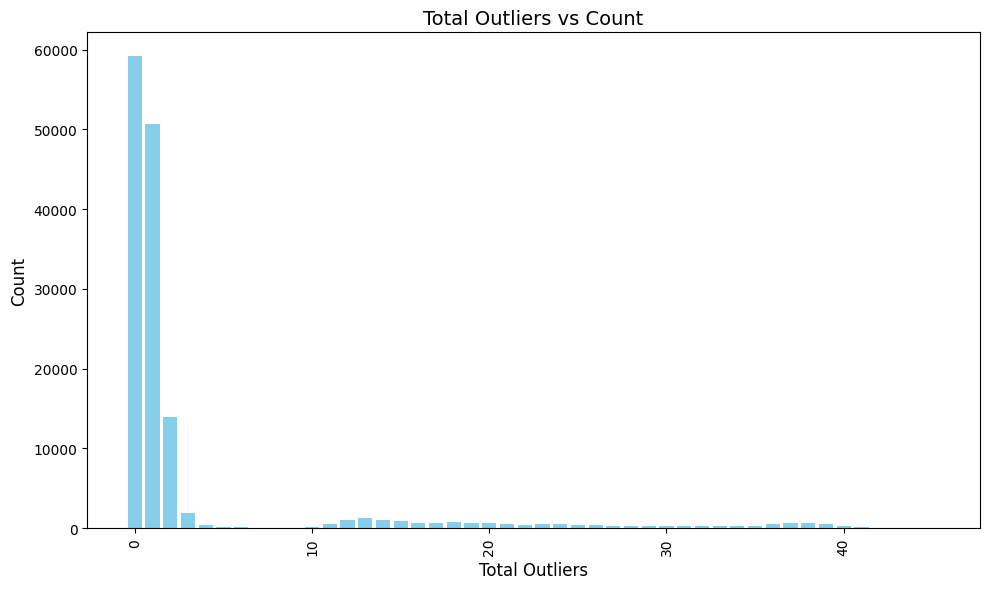

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

pandas_df = df_outliers.groupby("total_outliers").count().toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pandas_df["total_outliers"], pandas_df['count'], color='skyblue')
plt.xlabel('Total Outliers', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Total Outliers vs Count', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
#Getting rid of the entries which have more than 10 outliers
df_outliers_until_ten = df_outliers.\
        filter(df_outliers['total_outliers']<=10) 
print(df_outliers_until_ten.count())

126357


In [34]:
columns_to_check =['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 
    'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 
    'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
null_counts_df = df_outliers.select([
    count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in columns_to_check
])
null_counts_df.show(truncate=False, vertical=True)

-RECORD 0--
 ls  | 0   
 st  | 0   
 rs  | 0   
 lw  | 0   
 lf  | 0   
 cf  | 0   
 rf  | 0   
 rw  | 0   
 lam | 0   
 cam | 0   
 ram | 0   
 lm  | 0   
 lcm | 0   
 cm  | 0   
 rcm | 0   
 rm  | 0   
 lwb | 0   
 ldm | 0   
 cdm | 0   
 rdm | 0   
 rwb | 0   
 lb  | 0   
 lcb | 0   
 cb  | 0   
 rcb | 0   
 rb  | 0   
 gk  | 0   



#### Getting rid of 15722 entries (11.06% of the data) as they had more than 10 outliers (Bye bye Messi)

## Handling correlations

In [44]:
int_columns = [col for col, dtype in df_outliers_until_ten.dtypes if dtype == 'int']
df_int = df_outliers_until_ten.select(*int_columns)
df_int  = df_int.drop("overall","Data_Year", 'total_outliers' )

In [145]:
import seaborn as sns
correlation_matrix = df_int.toPandas().corr()

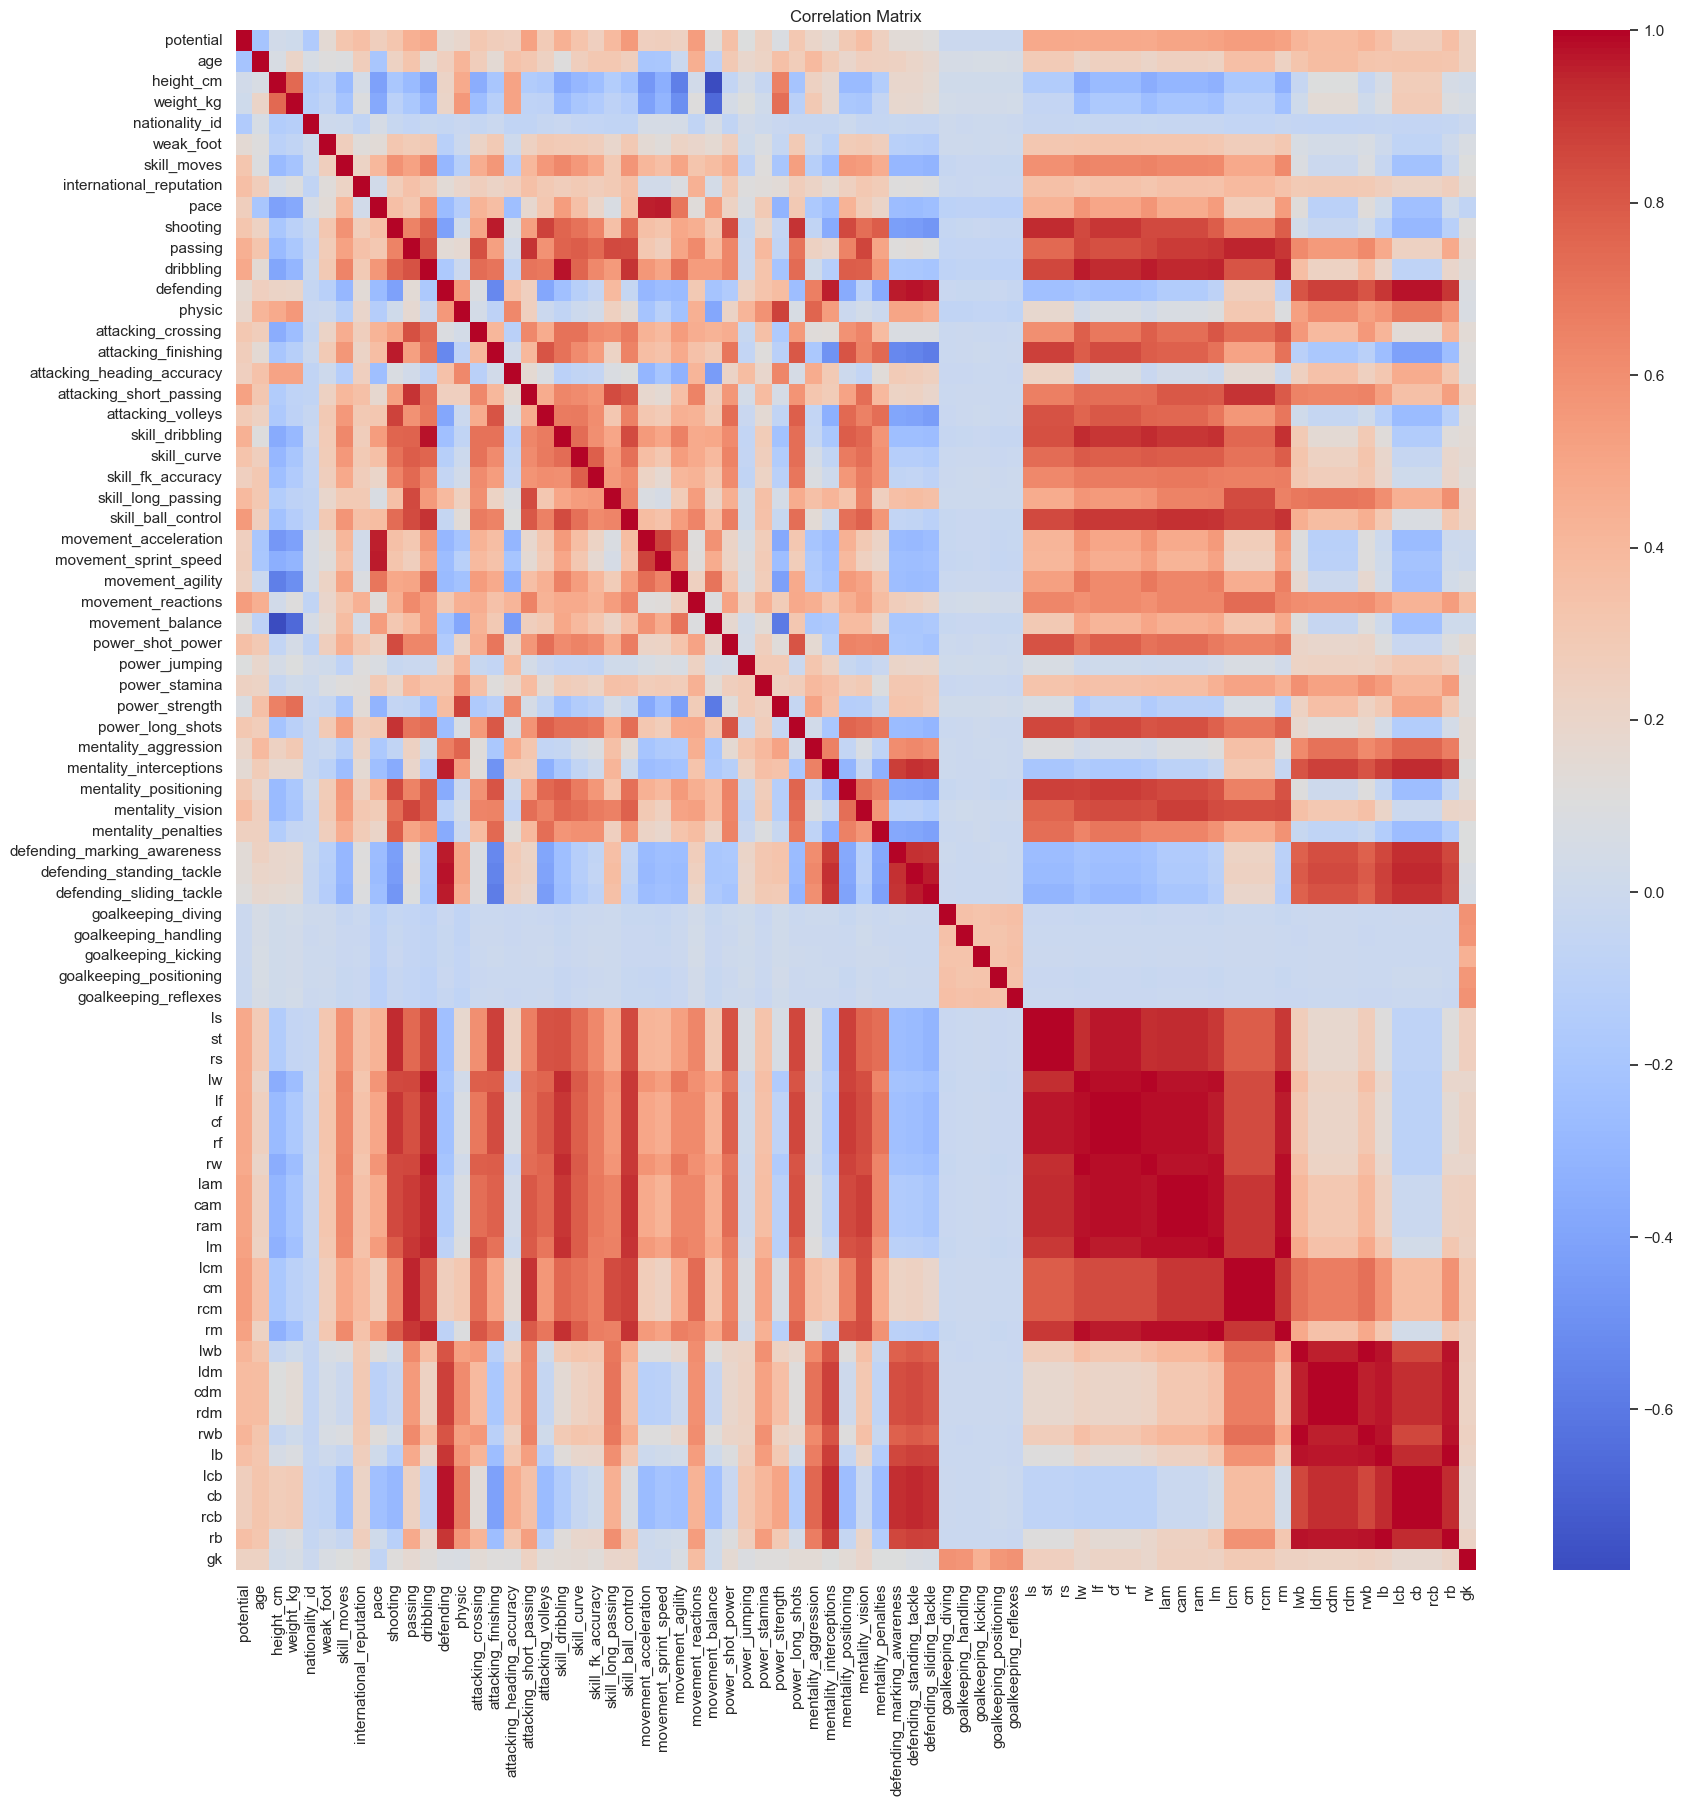

In [146]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1)  # Font size
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # annot=False removes text
plt.title('Correlation Matrix')
plt.show()

### Averaging highly correlated columns to reduce features

In [46]:
#As ls , rs, lf etc (attacking attributes) are highly correlated with each other, averaging them out to to keep one row. Doing the same for
# defensive attributes 'lwb','cdm' etc
from pyspark.sql import functions as F
columns_to_average = ['lwb', 'cdm', 'rdm', 'rwb','lb','lcb','cb','rcb','rb', 
                      'defending',
                      'defending_marking_awareness',
                      'defending_standing_tackle',
                      'defending_sliding_tackle']  # Columns showing defensive strength

df_handled_corr = df_outliers_until_ten.withColumn(
    'defensive_mean', 
    (F.col('lwb') + F.col('cdm') + F.col('rdm') + F.col('rwb') + 
     F.col('lb')+ F.col('lcb')+ F.col('cb')+ F.col('rcb') +  F.col('rb') +
     F.col('defending') + 
     F.col('defending_marking_awareness') + 
     F.col('defending_standing_tackle') + 
     F.col('defending_sliding_tackle'))/len(columns_to_average)
)
df_handled_corr = df_handled_corr.drop(*columns_to_average)



In [48]:
#Columns showing offensive strength
offensive_columns = [ 'ls', 'st', 'rs','lw','lf', 'cf','rf','rw','lam','cam','ram', 'lm','lcm','cm','rcm','rm']
df_handled_corr = df_handled_corr.withColumn(
    'offensive_mean', 
    (F.col('ls') + F.col('st') + F.col('rs') + F.col('lw') + F.col('lf')+ F.col('cf')+ F.col('rf')+ F.col('rw') +  F.col('lam')+ F.col('cam')+ F.col('ram')+ F.col('lm')+ F.col('lcm') +  F.col('cm')) / 14 
)
df_handled_corr = df_handled_corr.drop(*offensive_columns)

In [50]:
df_handled_corr = df_handled_corr.drop('total_outliers').drop('work_rate').drop('gk').drop('ldm')

In [52]:
columns_to_check =["age", "height_cm", "weight_kg", "pace", "shooting", "passing", 
                                      "dribbling", "physic", "attacking_crossing", 
                                      "attacking_finishing", "attacking_heading_accuracy", 
                                      "attacking_short_passing", "attacking_volleys", "skill_dribbling", 
                                      "skill_curve", "skill_fk_accuracy", "skill_long_passing", 
                                      "skill_ball_control", "movement_acceleration", 
                                      "movement_sprint_speed", "movement_agility", "movement_reactions", 
                                      "movement_balance", "power_shot_power", "power_jumping", 
                                      "power_stamina", "power_strength", "power_long_shots", 
                                      "mentality_aggression", "mentality_interceptions", 
                                      "mentality_positioning", "mentality_vision", "mentality_penalties", 
                                      "goalkeeping_diving", 
                                      "goalkeeping_handling", "goalkeeping_kicking", 
                                      "goalkeeping_positioning", "goalkeeping_reflexes", 
                                       "body_type","defensive_mean","offensive_mean"]
null_counts_df = df_handled_corr.select([
    count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in columns_to_check
])
null_counts_df.show(truncate=False, vertical=True)

-RECORD 0-------------------------
 age                        | 0   
 height_cm                  | 0   
 weight_kg                  | 0   
 pace                       | 0   
 shooting                   | 0   
 passing                    | 0   
 dribbling                  | 0   
 physic                     | 0   
 attacking_crossing         | 0   
 attacking_finishing        | 0   
 attacking_heading_accuracy | 0   
 attacking_short_passing    | 0   
 attacking_volleys          | 0   
 skill_dribbling            | 0   
 skill_curve                | 0   
 skill_fk_accuracy          | 0   
 skill_long_passing         | 0   
 skill_ball_control         | 0   
 movement_acceleration      | 0   
 movement_sprint_speed      | 0   
 movement_agility           | 0   
 movement_reactions         | 0   
 movement_balance           | 0   
 power_shot_power           | 0   
 power_jumping              | 0   
 power_stamina              | 0   
 power_strength             | 0   
 power_long_shots   

## Handling Binary, Ordinal and Nominal Variables

In [54]:
#Preferred foot and Gender are the only two binary variables, which are already handled in the beginning. Casting them
df_handled_binary = (df_handled_corr.withColumn("preferred_foot_new", df_handled_corr['preferred_foot'].cast('integer')).drop('preferred_foot'))

In [55]:
# Get distinct values from 'body_type' column
df_handled_binary = df_handled_binary.withColumn("body_type", when(df_handled_binary["body_type"] == "", "Normal").otherwise(df_handled_binary["body_type"]))
distinct_body_types = df_handled_binary.select(collect_set("body_type")).first()[0]
print(distinct_body_types)

['Stocky', 'Lean', 'Normal']


In [56]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

# Indexing and encoding categorical features
indexers = [
    StringIndexer(inputCol="body_type", outputCol="body_type_index")
]

encoders = [
    OneHotEncoder(inputCols=["body_type_index"], 
                  outputCols=["body_type_encoded"])
]

# Assembling all features into a single vector
assembler = VectorAssembler(inputCols=["age", "height_cm", "weight_kg", "pace", "shooting", "passing", 
                                      "dribbling", "physic", "attacking_crossing", 
                                      "attacking_finishing", "attacking_heading_accuracy", 
                                      "attacking_short_passing", "attacking_volleys", "skill_dribbling", 
                                      "skill_curve", "skill_fk_accuracy", "skill_long_passing", 
                                      "skill_ball_control", "movement_acceleration", 
                                      "movement_sprint_speed", "movement_agility", "movement_reactions", 
                                      "movement_balance", "power_shot_power", "power_jumping", 
                                      "power_stamina", "power_strength", "power_long_shots", 
                                      "mentality_aggression", "mentality_interceptions", 
                                      "mentality_positioning", "mentality_vision", "mentality_penalties",
                                       "goalkeeping_diving", 
                                      "goalkeeping_handling", "goalkeeping_kicking", 
                                      "goalkeeping_positioning", "goalkeeping_reflexes", "body_type_encoded","defensive_mean", "offensive_mean"], 
                          outputCol="features")

# Scaling features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")


In [57]:
pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler])

# Fitting the pipeline model
pipeline_model = pipeline.fit(df_handled_binary)

# Transforming data

df_encoded = pipeline_model.transform(df_handled_binary)

In [58]:
df_encoded.select("short_name", "overall", "scaled_features").show(2, vertical=True)

-RECORD 0-------------------------------
 short_name      | A. Robben            
 overall         | 90                   
 scaled_features | [6.61932171258115... 
-RECORD 1-------------------------------
 short_name      | Z. Ibrahimović       
 overall         | 90                   
 scaled_features | [7.06060982675322... 
only showing top 2 rows



In [59]:
df_readyToModel = df_encoded.select("scaled_features","overall")
df_readyToModel.show(1, vertical = True)

-RECORD 0-------------------------------
 scaled_features | [6.61932171258115... 
 overall         | 90                   
only showing top 1 row



### Spark ML: Model 1- Random Forest Regressor

In [61]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

trainData, testData = df_readyToModel.randomSplit([0.8, 0.2], seed=12)

rf = RandomForestRegressor(labelCol="overall", featuresCol="scaled_features", seed=12)

#### Hyperparameter Tuning:

In [143]:
# # Setting up the hyperparameter grid for tuning
# paramGrid = (ParamGridBuilder()
#              .addGrid(rf.numTrees, [10, 20, 50])     # Number of trees in the forest
#              .addGrid(rf.maxDepth, [5, 10, 15])       # Maximum depth of each tree
#              .addGrid(rf.maxBins, [16, 32, 40])       # Number of bins for splitting
#              .build())

# # Using root mean squared error as the metric
# evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="r2")

# # Set up CrossValidator
# crossval = CrossValidator(estimator=rf,
#                           estimatorParamMaps=paramGrid,
#                           evaluator=evaluator,
#                           numFolds=5)  # Use 5-fold cross-validation

# # Training the model on train data
# cvModel = crossval.fit(trainData)

In [145]:
# # Display the best model's parameters and RMSE
# bestModel = cvModel.bestModel
# print(f"Best numTrees: {bestModel.getNumTrees}")
# print(f"Best maxDepth: {bestModel.getMaxDepth()}")
# # print(f"Best maxBins: {bestModel.getMaxBins()}")

In [147]:
#Using the best one 
rf = RandomForestRegressor(labelCol="overall", featuresCol="scaled_features", numTrees=50, maxDepth=10, maxBins=32, seed=12) 
#The hyperparameters were obtained from a 3 hour long run on Google Cloud (screenshot attached)

rfModel = rf.fit(trainData)
predictions = rfModel.transform(testData)

# Evaluation metric chosen: RMSE
evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Test RMSE: {rmse:.4f}")

# Calculating R2 to test performance as well
evaluator_r2 = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"Test R²: {r2:.4f}")


Test RMSE: 1.2191
Test R²: 0.9693


#### Looks really good, a 0.97 R2 score means that the model is capturing the variance very well. A low test RMSE is also a good sign that the model is fitting well.

### Spark ML: Model 2 - Linear Regression 

In [262]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

#  LinearRegression model
# lr = LinearRegression(labelCol="overall", featuresCol="scaled_features")

# I identified two paramters: 1. L2 regularization strength  and number of iterations to be done
# paramGrid = (ParamGridBuilder()
#              .addGrid(lr.regParam, [0.01, 0.1, 0.5])    # L2 regularization values
#              .addGrid(lr.maxIter, [10, 25, 50])            # Maximum iterations
#              .build())

# evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="mse")

# crossval = CrossValidator(estimator=lr,
#                           estimatorParamMaps=paramGrid,
#                           evaluator=evaluator,
#                           numFolds=4)

# cvModel = crossval.fit(trainData)

In [264]:
# Get the best model for the LR
# bestModel = cvModel.bestModel
# print(f"Best regParam (L2 regularization): {bestModel._java_obj.parent().getRegParam()}")
# print(f"Best maxIter: {bestModel._java_obj.parent().getMaxIter()}") 

#### The best model we got after doing hyperparamter tuning by CrossValidation was L2 regularization as 0.01; maxIter as 10. Screenshot uploaded for proof. Using the same parameters

In [267]:
bestModel = LinearRegression(labelCol="overall", featuresCol="scaled_features", regParam=0.01, maxIter=10)


In [271]:
# Training data
fittedModel = bestModel.fit(trainData)

# Test dataset
test_predictions = fittedModel.transform(testData)
evaluator = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="mse")
test_mse = evaluator.evaluate(test_predictions)
print(f"Test MSE: {test_mse:.4f}")

# Calculate R² score for the test dataset as I wa
evaluator_r2 = RegressionEvaluator(labelCol="overall", predictionCol="prediction", metricName="r2")
test_r2 = evaluator_r2.evaluate(test_predictions)
print(f"Test R²: {test_r2:.4f}")

# Evaluate on the training dataset for comparison
train_predictions = fittedModel.transform(trainData)
train_r2 = evaluator_r2.evaluate(train_predictions)
print(f"Train R²: {train_r2:.4f}")


Test MSE: 7.0844
Test R²: 0.8534
Train R²: 0.8542


#### While this is are not the best test results we have gotten until now, they are considerably good. A lower MSE (than 2-3) would be preferable and a R2 score of more than 0.9 indicates a very good model. But given the complexities of this model, and LR being a relatively simpler model, I feel these are reasonable results. 

## Pytorch Models

In [62]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [63]:
df_dataset = df_readyToModel
df_dataset.dtypes
column_length = df_dataset.select(col('scaled_features')).count()
print(column_length)

126357


In [64]:
#Converting the Dataset into Pandas
df_dataset_pd = df_dataset.select('*').toPandas()

#Converting the entire dataset into tensors
x_dataset = torch.from_numpy(np.array(df_dataset_pd['scaled_features'].values.tolist(), np.float32))
y_dataset = torch.from_numpy(np.array(df_dataset_pd['overall'].values.tolist(), np.float32))

In [65]:
class MyDataset(Dataset): 
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx])

In [66]:
dataset = MyDataset(x_dataset, y_dataset) #getting the form right before splitting the dataset into test, train, validate

dataset_len = len(dataset)

train_dataset_len = round(dataset_len * 0.8)  # 80% for training
validate_dataset_len = round(dataset_len * 0.1)  # 10% for validation
test_dataset_len = dataset_len - train_dataset_len - validate_dataset_len  # Remaining 10% for testing


train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_dataset_len, validate_dataset_len, test_dataset_len])

## Model 1 (PyTorch): Multi Linear Perceptron

In [81]:
class MultiLinearPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.sequential = nn.Sequential(  
            nn.Linear(input_dim, 128),  # My model has 4 hidden layer, with 128 units each, and ReLU as an activation
            nn.ReLU(),                  
            nn.Linear(128, 128),        
            nn.ReLU(),                  
            nn.Linear(128, 128),        
            nn.ReLU(),                  
            nn.Linear(128, 128),        
            nn.ReLU(),                  
            nn.Linear(128, output_dim)  # Did not use final activation as it is a regression problem
        )

    def forward(self, x):
        y = self.sequential(x)
        return y

In [92]:
model = MultiLinearPerceptron(input_dim=42, output_dim=1) #Right now we have 42 features

#Hyperparameters
lr = 0.05
batch_size = 64
N_epochs = 10

loss_fun = nn.MSELoss() 
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [94]:
losses = []
train_losses = []
val_losses = []


current_best_loss = float('inf')

for epoch in range(N_epochs):
    # Training Loop
    batch_loss = []
    num_batches = 0
    model.train()  
    
    for x_batch, y_batch in train_dataloader:
        num_batches += 1        
        optimizer.zero_grad()  
        pred_score = model(x_batch)
        pred_score = pred_score.squeeze(1)
        
        loss = loss_fun(pred_score, y_batch)
        loss.backward()  
        optimizer.step()  
        
        batch_loss.append(loss.item())  

    # Validation Loop
    val_batch_loss = []
    model.eval()  # Model is in evaluation mode
    with torch.no_grad():  
        for x_batch, y_batch in val_dataloader:
            pred_score = model(x_batch)
            pred_score = pred_score.squeeze(1)

            loss = loss_fun(pred_score, y_batch)
            val_batch_loss.append(loss.item())

    # After epoch processing
    losses.extend(batch_loss)
    train_losses.append(np.mean(np.array(batch_loss)))  # Mean train loss for this epoch
    val_losses.append(np.mean(np.array(val_batch_loss)))  # Mean validation loss for this epoch
    
    print(f"Epoch = {epoch}, train_loss = {train_losses[-1]}, val_loss = {val_losses[-1]}")

    if val_losses[-1] < current_best_loss:
        print("Current epoch is the best so far. Saving model...")
        torch.save(model.state_dict(), 'MLP_best_model')
        current_best_loss = val_losses[-1]


Epoch = 0, train_loss = 147.2103757404074, val_loss = 5.544354962580131
Current epoch is the best so far. Saving model...
Epoch = 1, train_loss = 8.164685360917563, val_loss = 8.83491682283806
Epoch = 2, train_loss = 6.490625126678732, val_loss = 3.425934621179947
Current epoch is the best so far. Saving model...
Epoch = 3, train_loss = 6.175568715077413, val_loss = 7.184485449935451
Epoch = 4, train_loss = 3.86836787009541, val_loss = 3.321721552598356
Current epoch is the best so far. Saving model...
Epoch = 5, train_loss = 4.612818145450158, val_loss = 2.8030951251887313
Current epoch is the best so far. Saving model...
Epoch = 6, train_loss = 4.476800158808503, val_loss = 2.8822627687695053
Epoch = 7, train_loss = 3.551122045592417, val_loss = 4.1801747998805965
Epoch = 8, train_loss = 3.550938190463223, val_loss = 2.6877899681678925
Current epoch is the best so far. Saving model...
Epoch = 9, train_loss = 3.45690761223624, val_loss = 7.398708745686695


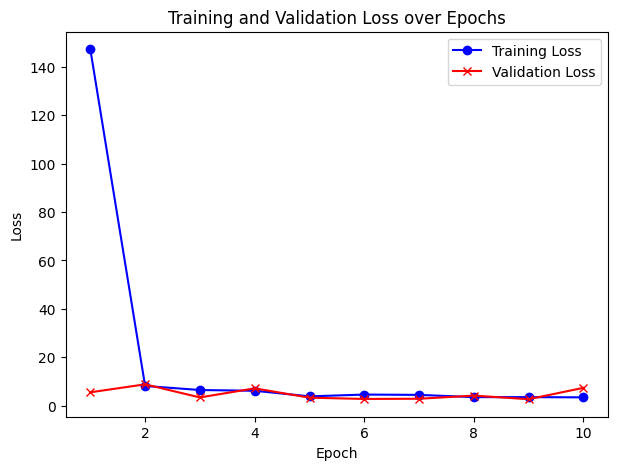

In [95]:
plt.figure(figsize=(7, 5)) 
plt.plot(range(1, (N_epochs)+1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(range(1,  (N_epochs)+1), val_losses, label='Validation Loss', color='red', linestyle='-', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

#### Hyperparamter Tuning for MLP Model: (Decreased LR, increased epochs)

In [96]:
model= MultiLinearPerceptron(input_dim=42, output_dim=1) #Right now we have 42 features

#Hyperparameters
lr = 0.005
batch_size = 64
N_epochs = 20

loss_fun = nn.MSELoss() 
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [97]:
losses = []
train_losses = []
val_losses = []

#No initializing required as it compares to the loss of the previous model
for epoch in range(N_epochs):
    # Training Loop
    batch_loss = []
    num_batches = 0
    model.train()  
    
    for x_batch, y_batch in train_dataloader:
        num_batches += 1        
        optimizer.zero_grad()  
        pred_score = model(x_batch)
        pred_score = pred_score.squeeze(1)
        
        loss = loss_fun(pred_score, y_batch)
        loss.backward()  
        optimizer.step()  
        
        batch_loss.append(loss.item())  

    # Validation Loop
    val_batch_loss = []
    model.eval()  # Model is in evaluation mode
    with torch.no_grad():  
        for x_batch, y_batch in val_dataloader:
            pred_score = model(x_batch)
            pred_score = pred_score.squeeze(1)

            loss = loss_fun(pred_score, y_batch)
            val_batch_loss.append(loss.item())

    # After epoch processing
    losses.extend(batch_loss)
    train_losses.append(np.mean(np.array(batch_loss)))  # Mean train loss for this epoch
    val_losses.append(np.mean(np.array(val_batch_loss)))  # Mean validation loss for this epoch
    
    print(f"Epoch = {epoch}, train_loss = {train_losses[-1]}, val_loss = {val_losses[-1]}")

    if val_losses[-1] < current_best_loss:
        print("Current epoch is the best so far. Saving model...")
        torch.save(model.state_dict(), 'MLP_best_model')
        current_best_loss = val_losses[-1]


Epoch = 0, train_loss = 24.610582864359966, val_loss = 4.344793771252488
Epoch = 1, train_loss = 3.6179866038545776, val_loss = 2.1305320816810687
Current epoch is the best so far. Saving model...
Epoch = 2, train_loss = 2.9494391809535934, val_loss = 1.8264846199690694
Current epoch is the best so far. Saving model...
Epoch = 3, train_loss = 2.522578848690926, val_loss = 2.4909824963771934
Epoch = 4, train_loss = 2.373088762654534, val_loss = 1.9302208983536921
Epoch = 5, train_loss = 2.112506824354582, val_loss = 3.314865236330514
Epoch = 6, train_loss = 1.9609935181238982, val_loss = 2.2293568933852996
Epoch = 7, train_loss = 1.9384189522719082, val_loss = 2.239266760421522
Epoch = 8, train_loss = 1.7400241717884812, val_loss = 1.1254011744802648
Current epoch is the best so far. Saving model...
Epoch = 9, train_loss = 1.5112320859032342, val_loss = 2.252661329929275
Epoch = 10, train_loss = 1.6109274678781063, val_loss = 1.055985732211007
Current epoch is the best so far. Saving mo

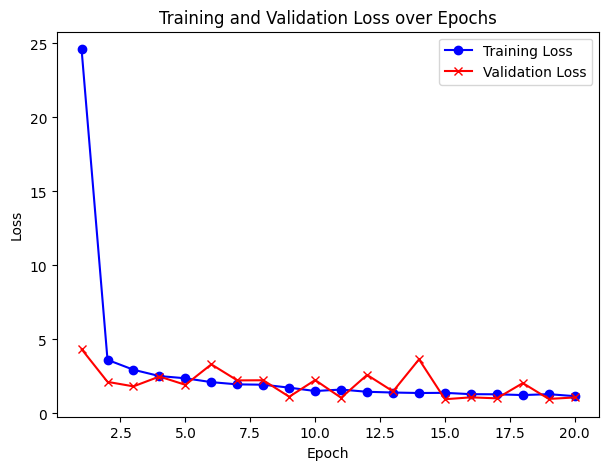

In [102]:
plt.figure(figsize=(7, 5)) 
plt.plot(range(1, (N_epochs)+1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(range(1,  (N_epochs)+1), val_losses, label='Validation Loss', color='red', linestyle='-', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [106]:
#load best model to run on the test dataset
mybestmodel = MultiLinearPerceptron(input_dim=42, output_dim=1) #Right now we have 42 features

mybestmodel.load_state_dict(torch.load("MLP_best_model"))

C:\Users\jayan\AppData\Local\Temp\ipykernel_16980\1589106686.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mybestmodel.load_state_dict(torch.load("MLP_best_model"))


<All keys matched successfully>

In [108]:
from sklearn.metrics import r2_score #Using R square as a metric for performance

mybestmodel.eval()
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

test_batch_loss = [] 
true_labels = [] 
predictions = [] #For Rsquare calculation

for x_batch, y_batch in test_dataloader:
    with torch.no_grad():  # No gradient computation for testing
        pred_score = mybestmodel(x_batch)
        pred_score = pred_score.squeeze()  #So that I dont get the dimension error
        
        batch_loss = loss_fun(pred_score, y_batch) #For loss
        test_batch_loss.append(batch_loss.item()) 
        
        true_labels.append(y_batch.numpy())  #For R square
        predictions.append(pred_score.numpy()) 
        
test_loss = np.mean(test_batch_loss)
print(f"Test MSE = {test_loss:.4f}")

true_labels = np.concatenate(true_labels, axis=0)
predictions = np.concatenate(predictions, axis=0)

r2 = r2_score(true_labels, predictions)
print(f"Test R² score: {r2:.4f}")

Test MSE = 0.9353
Test R² score: 0.9808


#### The Neural Network fits the data well, and a low test MSE of 0.935 is a good indicator that the model is running well. Also a high R sqaure of 0.98 tells that the model is captauring the variance well 

### Model 2 (PyTorch): Linear Regression

In [111]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  # One Linear Layer doing w*X + b = Y

    def forward(self, x):
        return self.linear(x)

In [115]:
model2 = LinearRegressionModel(input_dim=42, output_dim=1)

#Hyperparameters
lr = 0.0005
batch_size = 64
N_epochs = 10

loss_fun = nn.MSELoss()  
optimizer = torch.optim.SGD(model2.parameters(), lr=lr) # Using SGD instead of Adam for this one

In [117]:
current_best_loss = float('inf') #Initialize for first run

for epoch in range(N_epochs):
    model2.train()  #Training Mode
    total_loss = 0.0
    batch_loss = []  #For loss (I will compute r square in test)
    
    # Training loop
    for x_batch, y_batch in train_dataloader:
        optimizer.zero_grad()
        y_pred = model2(x_batch)
        y_pred = y_pred.squeeze(1)
        loss = loss_fun(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        batch_loss.append(loss.item())  
        
    # Validation loop
    val_batch_loss = []  #For validation loss
    model2.eval()  # Evaluation mode
    with torch.no_grad():  # No gradients for validation
        for x_batch, y_batch in val_dataloader:
            pred_score = model2(x_batch)
            pred_score = pred_score.squeeze(1)  # To avoid dimension mismatch
            
            loss = loss_fun(pred_score, y_batch)
            val_batch_loss.append(loss.item())
    
    # After epoch processing
    train_losses.append(np.mean(np.array(batch_loss)))  # Mean train loss for this epoch
    val_losses.append(np.mean(np.array(val_batch_loss)))  # Mean validation loss for this epoch
        
    print(f"Epoch = {epoch}, train_loss = {train_losses[-1]}, val_loss = {val_losses[-1]}")
    
    # Save model if it's the best so far
    if val_losses[-1] < current_best_loss:
        print("Current epoch is the best so far. Saving model...")
        torch.save(model2.state_dict(), 'LR_best_model')
        current_best_loss = val_losses[-1]
    
    # Print average loss for this epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch [{epoch+1}/{N_epochs}], Loss: {avg_loss:.4f}")


Epoch = 0, train_loss = 18.34175845641124, val_loss = 11.563351200084494
Current epoch is the best so far. Saving model...
Epoch [1/10], Loss: 18.3418
Epoch = 1, train_loss = 9.191458364378049, val_loss = 8.830368282819036
Current epoch is the best so far. Saving model...
Epoch [2/10], Loss: 9.1915
Epoch = 2, train_loss = 8.6892325760443, val_loss = 7.783910777833727
Current epoch is the best so far. Saving model...
Epoch [3/10], Loss: 8.6892
Epoch = 3, train_loss = 8.483452051953424, val_loss = 8.44481262052902
Epoch [4/10], Loss: 8.4835
Epoch = 4, train_loss = 8.257471819316285, val_loss = 12.830443666438864
Epoch [5/10], Loss: 8.2575
Epoch = 5, train_loss = 8.200211016437676, val_loss = 8.259767859873145
Epoch [6/10], Loss: 8.2002
Epoch = 6, train_loss = 8.145111168487162, val_loss = 7.587664146616001
Current epoch is the best so far. Saving model...
Epoch [7/10], Loss: 8.1451
Epoch = 7, train_loss = 8.158222863040393, val_loss = 14.98679607083099
Epoch [8/10], Loss: 8.1582
Epoch = 

#### Hyperparameter tuning (Changed optimizer to Adam from SGD, decreased learning rate, increased epochs)

In [129]:
model2 = LinearRegressionModel(input_dim=42, output_dim=1)

#Hyperparameters
lr = 0.0001
batch_size = 64
N_epochs = 30

loss_fun = nn.MSELoss()  
optimizer = torch.optim.Adam(model2.parameters(), lr=lr) # Using Adam instead of SGD for this one

In [131]:
for epoch in range(N_epochs):
    model2.train()  #Training Mode
    total_loss = 0.0
    batch_loss = []  #For loss (I will compute r square in test)
    
    # Training loop
    for x_batch, y_batch in train_dataloader:
        optimizer.zero_grad()
        y_pred = model2(x_batch)
        y_pred = y_pred.squeeze(1)
        loss = loss_fun(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        batch_loss.append(loss.item())  
        
    # Validation loop
    val_batch_loss = []  #For validation loss
    model2.eval()  # Evaluation mode
    with torch.no_grad():  # No gradients for validation
        for x_batch, y_batch in val_dataloader:
            pred_score = model2(x_batch)
            pred_score = pred_score.squeeze(1)  # To avoid dimension mismatch
            
            loss = loss_fun(pred_score, y_batch)
            val_batch_loss.append(loss.item())
    
    # After epoch processing
    train_losses.append(np.mean(np.array(batch_loss)))  # Mean train loss for this epoch
    val_losses.append(np.mean(np.array(val_batch_loss)))  # Mean validation loss for this epoch
        
    print(f"Epoch = {epoch}, train_loss = {train_losses[-1]}, val_loss = {val_losses[-1]}")
    
    # Save model if it's the best so far
    if val_losses[-1] < current_best_loss: #This compared it to the current_best_loss of the previous run. If it's better, new model is saved
        print("Current epoch is the best so far. Saving model...")
        torch.save(model2.state_dict(), 'LR_best_model')
        current_best_loss = val_losses[-1]
    
    # Print average loss for this epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch [{epoch+1}/{N_epochs}], Loss: {avg_loss:.4f}")


Epoch = 0, train_loss = 2785.5126260105567, val_loss = 1407.400304312658
Epoch [1/30], Loss: 2785.5126
Epoch = 1, train_loss = 711.0107003417196, val_loss = 244.1313395644679
Epoch [2/30], Loss: 711.0107
Epoch = 2, train_loss = 95.26922602774222, val_loss = 25.644326903603293
Epoch [3/30], Loss: 95.2692
Epoch = 3, train_loss = 19.448719846749608, val_loss = 17.7326843425481
Epoch [4/30], Loss: 19.4487
Epoch = 4, train_loss = 17.51178117764147, val_loss = 17.088062695782593
Epoch [5/30], Loss: 17.5118
Epoch = 5, train_loss = 16.610460119006, val_loss = 15.968238767951426
Epoch [6/30], Loss: 16.6105
Epoch = 6, train_loss = 15.260950524897515, val_loss = 14.550819618533357
Epoch [7/30], Loss: 15.2610
Epoch = 7, train_loss = 13.824060845073266, val_loss = 13.234807450361926
Epoch [8/30], Loss: 13.8241
Epoch = 8, train_loss = 12.762569940241077, val_loss = 12.398729464020391
Epoch [9/30], Loss: 12.7626
Epoch = 9, train_loss = 12.098258393927466, val_loss = 11.893593217387345
Epoch [10/30], 

In [133]:
#load best model to run on the test dataset
mybest_lr_model = LinearRegressionModel(input_dim=42, output_dim=1) #Right now we have 42 features

mybest_lr_model.load_state_dict(torch.load("LR_best_model"))

C:\Users\jayan\AppData\Local\Temp\ipykernel_16980\1516284096.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mybest_lr_model.load_state_dict(torch.load("LR_best_model"))

<All keys matched successfully>

In [135]:
from sklearn.metrics import r2_score #Using R square as a metric for performance

mybest_lr_model.eval()
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

test_batch_loss = [] 
true_labels = [] 
predictions = [] #For Rsquare calculation

for x_batch, y_batch in test_dataloader:
    with torch.no_grad():  # No gradient computation for testing
        pred_score = mybestmodel(x_batch)
        pred_score = pred_score.squeeze()  #So that I dont get the dimension error
        
        batch_loss = loss_fun(pred_score, y_batch) #For loss
        test_batch_loss.append(batch_loss.item()) 
        
        true_labels.append(y_batch.numpy())  #For R square
        predictions.append(pred_score.numpy()) 
        
test_loss = np.mean(test_batch_loss)
print(f"Test MSE = {test_loss:.4f}")

true_labels = np.concatenate(true_labels, axis=0)
predictions = np.concatenate(predictions, axis=0)

r2 = r2_score(true_labels, predictions)
print(f"Test R² score: {r2:.4f}")

Test MSE = 0.9351
Test R² score: 0.9808


### The linear regression model, despite being a very simple model with one layer of w*X+b gave reasonable results, because of a high epoch. The final test MSE is 0.93 (very low) which is good, and a high 0.98 r sqaure indicates that it captured the variance properly

## Task 4 - Run the model on Cloud 

Shown in a seperate video file